# 5.4 Python 编程实践———蛋白质消费特征分析

## 1.数据的读入

In [1]:

import pandas as pd
protein = pd.read_table('protein.txt', sep='\t')
pd.read_table?

In [2]:

protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


## 2.数据理解

In [3]:

print(protein.describe())

         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr&Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.700000   4.700000   4.90000

In [4]:

print(protein.columns)

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')


In [5]:

print(protein.shape)

(25, 10)


## 3 数据规整化处理


In [6]:
from sklearn import preprocessing


sprotein = protein.drop(['Country'], axis=1)


sprotein_scaled = preprocessing.scale(sprotein)
#https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler 

print(sprotein_scaled)

[[ 0.08294065 -1.79475017 -2.22458425 -1.1795703  -1.22503282  0.9348045
  -2.29596509  1.24796771 -1.37825141]
 [-0.28297397  1.68644628  1.24562107  0.40046785 -0.6551106  -0.39505069
  -0.42221774 -0.91079027  0.09278868]
 [ 1.11969872  0.38790475  1.06297868  0.05573225  0.06479116 -0.5252463
   0.88940541 -0.49959828 -0.07694671]
 [-0.6183957  -0.52383718 -1.22005113 -1.2657542  -0.92507375  2.27395937
  -1.98367386  0.32278572  0.03621022]
 [-0.03903089  0.96810416 -0.12419682 -0.6624669  -0.6851065   0.19082957
   0.45219769 -1.01358827 -0.07694671]
 [ 0.23540507  0.8023329   0.69769391  1.13303099  1.68457011 -0.96233157
   0.3272812  -1.21918427 -0.98220215]
 [-0.43543839  1.02336124  0.69769391 -0.86356267  0.33475432 -0.71124003
   1.38907137 -1.16778527 -0.30326057]
 [-0.10001666 -0.82775116 -0.21551801  2.38269753  0.45473794 -0.55314536
   0.51465594 -1.06498727 -1.5479868 ]
 [ 2.49187852  0.55367601  0.33240914  0.34301192  0.42474204 -0.385751
   0.3272812  -0.34540128 

In [7]:
preprocessing.scale?

## 4 数据建模

In [8]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
 
from sklearn.cluster import KMeans


In [21]:
#K值的选择
NumberOfClusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in NumberOfClusters]
score = [kmeans[i].fit(sprotein_scaled).score(sprotein_scaled) for i in range(len(kmeans))]
score
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score

[-225.0,
 -139.50737044831814,
 -110.40242709032152,
 -92.4000063575271,
 -75.85361543875908,
 -62.11420684088032,
 -56.17706755391505,
 -47.9587354627516,
 -41.678411521520346,
 -35.99598817475995,
 -31.273790745076337,
 -27.79215051959273,
 -23.424715035186374,
 -19.08467073716198,
 -17.392770968044893,
 -13.476648949999609,
 -10.99530149693003,
 -8.545460381665688,
 -6.704106008601115]

In [11]:
kmeans[1].fit(sprotein_scaled).score

C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<bound method _BaseKMeans.score of KMeans(n_clusters=2)>

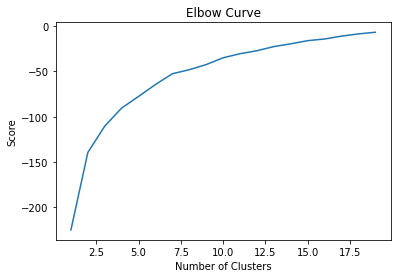

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumberOfClusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:

myKmeans = KMeans(algorithm="auto",n_clusters=5,n_init=10,max_iter=200,verbose=0)
 
 

In [14]:
 
myKmeans.fit(sprotein_scaled)

C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(algorithm='auto', max_iter=200, n_clusters=5)

In [15]:
myKmeans?

## 5 查看模型

In [16]:
 
print(myKmeans)

KMeans(algorithm='auto', max_iter=200, n_clusters=5)


## 6 模型预测

In [17]:
 
y_kmeans = myKmeans.predict(sprotein)
print(y_kmeans)

[1 0 0 1 1 0 0 2 0 1 1 0 1 0 2 4 3 1 3 0 0 0 1 0 1]


C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


## 7 结果输出

In [18]:
protein["所隶属的类簇"]=y_kmeans
protein       

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,所隶属的类簇
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,0
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,0
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,0
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,0
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,1
